# Центральная предельная теорема своими руками

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение)

## Гистограмма

Выберем экспоненциальное распределение случайной величины с $\lambda = 3$

Плотность распределения будет иметь вид:

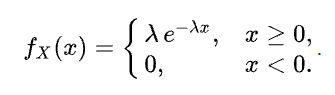

Экспоненциальное распределение моделирует время между двумя последовательными свершениями события, а параметр λ описываетс среднее число наступлений события в единицу времени. Обычно с помощью этого закона описывают: продолжительность обслуживания покупателя, время жизни оборудования до отказа, промежуток времени между поломками и т.п.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [194]:
lamb=3 # лямбда
x=np.linspace(0,10,1000) # создаем выборку из 1000 значений
exp_pdf=sts.expon.pdf(x,scale=1/lamb)# scale = 1 / lambda, а lambda=3, поэтому 1/3

Построим график плотности экспоненциального распределения

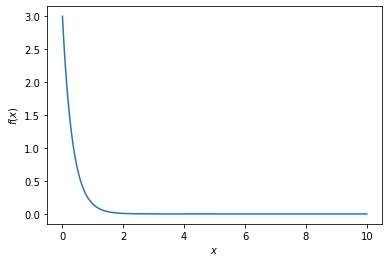

In [111]:
plt.plot(x,exp_pdf);
plt.ylabel('$f(x)$');
plt.xlabel('$x$');

Теперь построим гистограмму этого распределения, а поверх теоретическую плотность распределения

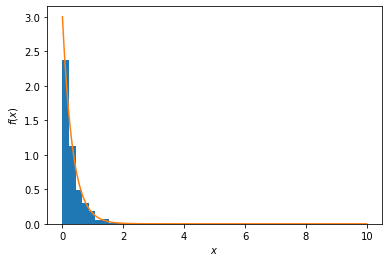

In [112]:
rv=sts.expon.rvs(scale=1/lamb,size=1000,random_state=2)
plt.hist(rv,density=True); # параметр normed заменили на density 
plt.plot(x,exp_pdf);
plt.ylabel('$f(x)$');
plt.xlabel('$x$');


Вывод: Гистограмма выборки практически совпадает с графиком плотности вероятности экспоненциального распределения

## Распределение выборочного среднего

Напишем функцию, которая генерирует 1000 выборок объема n

In [219]:
def cut_samples(n):

    y=[]
    
    for _ in range(1000):

        y_dot=np.mean(sts.expon.rvs(scale=1/lamb,size=n))
        y.append(y_dot)
    
    return y   # возвращается список выборочных средних 

Нарисуем гистограмму распределения выборочного среднего, и используя информацию о мат. ожидании и дисперсии экспоненциального распределения, рассчитаем параметры нормального распределения и нарисуем его график поверх гистограммы 

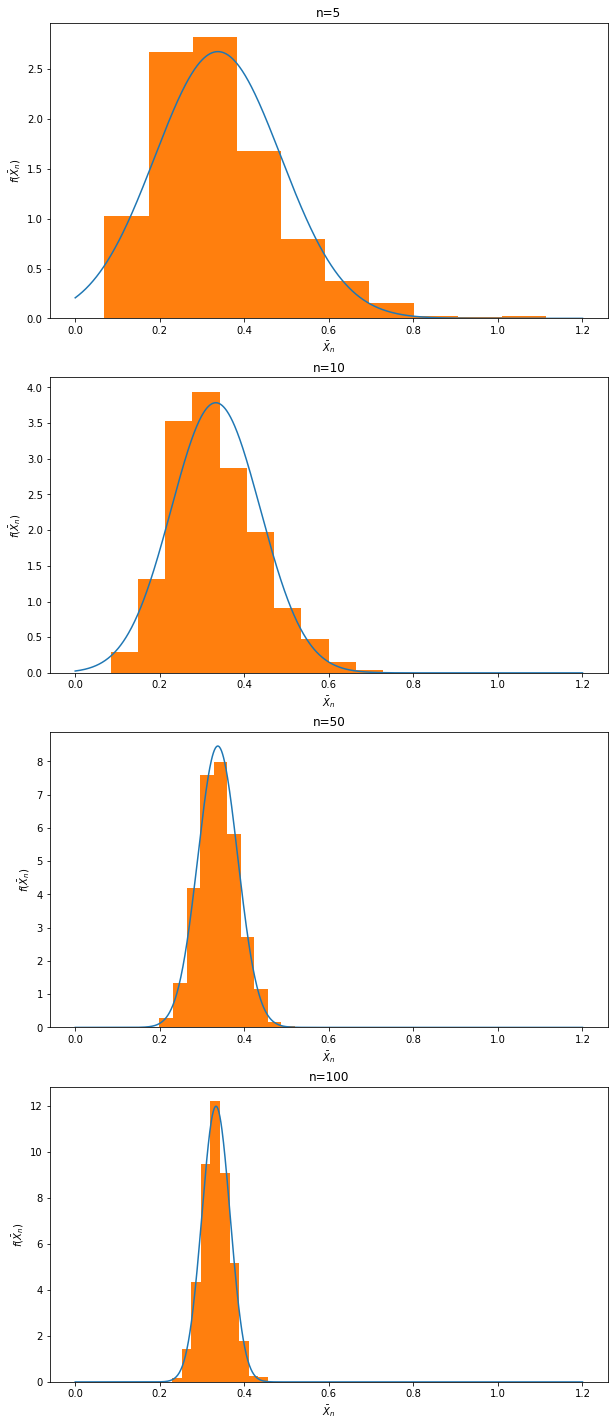

In [226]:
n_value=[5,10,50,100]
fig,ax=plt.subplots(len(n_value),figsize=(10, 25));

for i in range(len(n_value)):
    
    y=cut_samples(n_value[i])
    norm_rv=sts.norm(loc=np.mean(y),scale=(1/(n_value[i]*lamb**2))**0.5)
    x_new=np.linspace(0,1.2,1000)
    pdf = norm_rv.pdf(x_new)
    ax[i].plot(x_new,pdf);
    ax[i].hist(y,density=True);
    ax[i].set_title(f'n={n_value[i]}')
    ax[i].set_xlabel('$\\bar{X}_n$')
    ax[i].set_ylabel('$f (\\bar{X}_n)$')
    


Вывод: ЦПТ прекрасна. Чем больше размер выборки n, тем больше распределение выборочных средних соответствует нормальному. 